# PAP V213: Kreisel

Werte in roher Form:
Beste Werte aus Fit:
[  6.90146482e+02   6.53077286e-04]
Fehler der Werte aus Fit (Wurzel der Kovarianzmatrixwerte)
[  1.06456985e+00   4.18013777e-06]
Chiquadratsumme:
2.59047875241
Fitwahrscheinlichkeit=76.0%


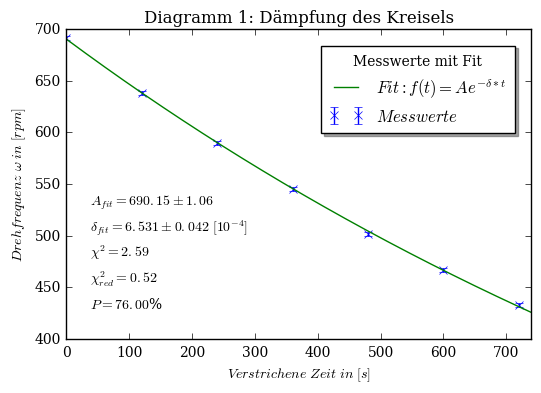

In [36]:
#Aufgabe 2: Dämpfung des Kreisels

#Import der Module
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Einlesen der Daten in folgender Reihenfolge:
t, w = np.loadtxt('tab1.txt', skiprows=1, usecols=(0,1), unpack=True)
#Zeit t in min
#Drefrequenz in rpm

t = t*60 #Umrechnen der Zeit in Sekunden 

# Fit mit einer Exponentialfunktion
def fit_func(x, A, d):
    return A*np.exp(-x*d)


#Fit durchführen
popt, pcov = curve_fit(fit_func, t, w, maxfev=5000, p0=[700,0.0006], sigma=2)
perr = np.sqrt(np.diag(pcov))
x=np.arange(0, 750, 0.1)


#Güte des Fits
chisquare=np.sum((((fit_func(t,*popt))-w)/(2))**2)
dof=5 #degrees of freedom, Freiheitsgrad Anzahl Messwerte (7) - Fitparameter (2)
chisquare_red=chisquare/dof

from scipy.stats import chi2 
prob=round(1-chi2.cdf(chisquare,dof),2)*100 


#Plotten
plt.errorbar(t, w, yerr=2, linestyle='None', marker='x', label='$Messwerte$')
plt.plot(x, fit_func(x, *popt), label='$Fit: f(t)=Ae^{-\delta*t}$')
# \n $A=%.3f \pm%.3f$ \n $ \delta=%.3f \pm%.3f$' %(popt[0], perr[0], popt[1], perr[1])
plt.xlabel('$Verstrichene\ Zeit\ in\ [s]$')
plt.ylabel('$Drehfrequenz\ \omega \ in\ [rpm]$')
plt.title(r'Diagramm 1: Dämpfung des Kreisels')
#plt.yscale('log')
#plt.grid(True)
plt.axis((0, 740, 400, 700))
plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 5
plt.rcParams["font.family"]='serif'
plt.legend(title='Messwerte mit Fit', borderpad=0.5, borderaxespad=1, loc='best', shadow='true')

#Text im Plot
plt.text(38, 530, u'$A_{fit}=%.2f \pm%.2f$' %(popt[0], perr[0]), fontsize=10)
plt.text(38, 505, u'$\delta_{fit}=%.3f \pm%.3f\ [10^{-4}]$' %(popt[1]*10000, perr[1]*10000), fontsize=10)
plt.text(38, 480, u'$\chi^{2}=%.2f$' %(chisquare), fontsize=10)
plt.text(38, 455, u'$\chi_{red}^{2}=%.2f $' %(chisquare_red), fontsize=10)
plt.text(38, 430, u'$P=%.2f $' %(prob) + '%', fontsize=10)


print('Werte in roher Form:')
print('Beste Werte aus Fit:')
print(popt)
print('Fehler der Werte aus Fit (Wurzel der Kovarianzmatrixwerte)')
print(perr)
print('Chiquadratsumme:')
print (chisquare)
print("Fitwahrscheinlichkeit="+str(prob)+"%")

#plt.savefig('v213_1.pdf',format='pdf')
